
=== Évaluation du modèle FaceNet ===
Accuracy: 99.33%


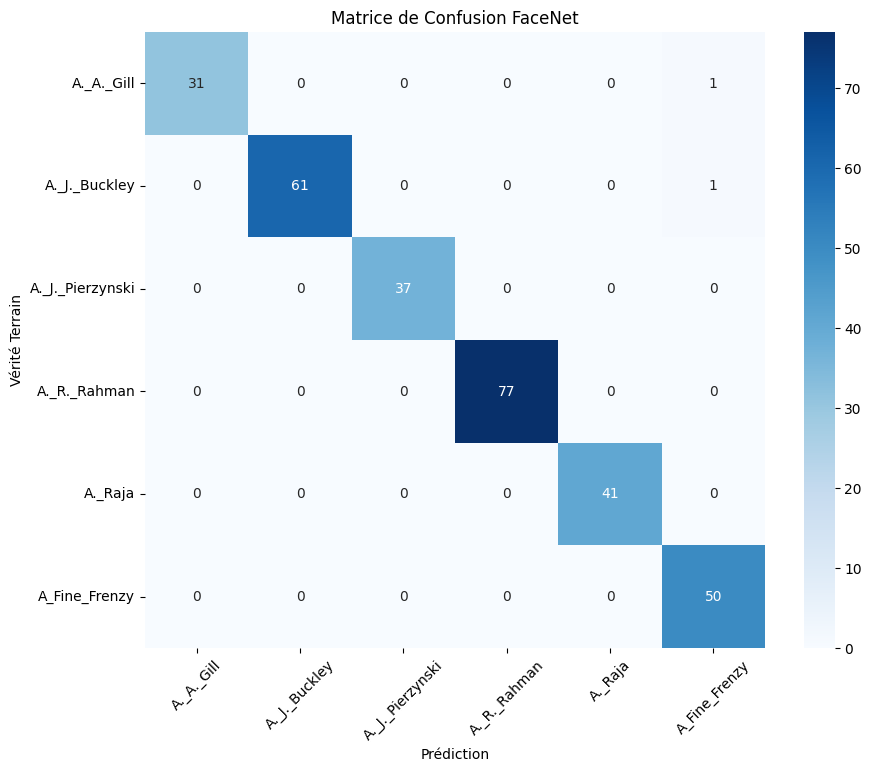

Rapport de classification :

                  precision    recall  f1-score   support

      A._A._Gill       1.00      0.97      0.98        32
   A._J._Buckley       1.00      0.98      0.99        62
A._J._Pierzynski       1.00      1.00      1.00        37
    A._R._Rahman       1.00      1.00      1.00        77
         A._Raja       1.00      1.00      1.00        41
   A_Fine_Frenzy       0.96      1.00      0.98        50

        accuracy                           0.99       299
       macro avg       0.99      0.99      0.99       299
    weighted avg       0.99      0.99      0.99       299


=== Évaluation du modèle ArcFace ===
Accuracy: 97.97%


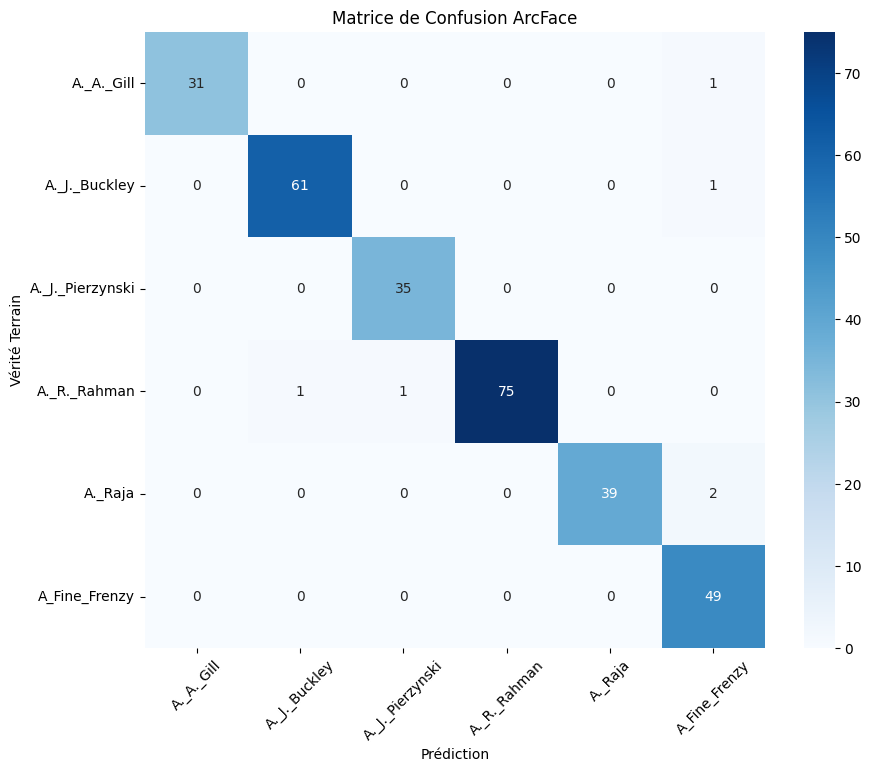

Rapport de classification :

                  precision    recall  f1-score   support

      A._A._Gill       1.00      0.97      0.98        32
   A._J._Buckley       0.98      0.98      0.98        62
A._J._Pierzynski       0.97      1.00      0.99        35
    A._R._Rahman       1.00      0.97      0.99        77
         A._Raja       1.00      0.95      0.97        41
   A_Fine_Frenzy       0.92      1.00      0.96        49

        accuracy                           0.98       296
       macro avg       0.98      0.98      0.98       296
    weighted avg       0.98      0.98      0.98       296


=== Évaluation du modèle ModelPerso ===


FileNotFoundError: [Errno 2] No such file or directory: '../models/personal_model/embeddings.pkl'

In [1]:
import sys
sys.path.append('../src/visualization')

import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def load_embeddings(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

def prepare_data(embedding_dict):
    embeds = []
    labels = []
    for person, emb_arr in embedding_dict.items():
        embeds.append(emb_arr)
        labels.extend([person] * emb_arr.shape[0])
    return np.vstack(embeds), np.array(labels)

def plot_confusion_matrix(cm, classes, title='Matrice de Confusion', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Vérité Terrain')
    plt.xlabel('Prédiction')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Chemins vers fichiers embeddings
paths = {
    
    'FaceNet': '../models/facenet/embeddings.pkl',
    'ArcFace': '../models/arcface/embeddings.pkl',
    'ModelPerso': '../models/personal_model/embeddings.pkl'  # adapte ici si besoin
}

for model_name, path in paths.items():
    print(f"\n=== Évaluation du modèle {model_name} ===")
    embeddings_dict = load_embeddings(path)
    X, y = prepare_data(embeddings_dict)
    
    # Split train/test 80/20 stratifié
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Classifieur simple k-NN (k=3)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc*100:.2f}%")
    
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    plot_confusion_matrix(cm, classes=np.unique(y), title=f"Matrice de Confusion {model_name}")
    
    print("Rapport de classification :\n")
    print(classification_report(y_test, y_pred, zero_division=0))
